<a href="https://colab.research.google.com/github/mk2436/kadam_mihir_finaltermproj/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TODO LIST**

1. change data set path

In [1]:
# Dependencies
import kagglehub

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:
# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/credit-card-approval-clean-data")

print("Path to dataset files:", path)

100%|██████████| 19.0k/19.0k [00:00<00:00, 32.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/samuelcortinhas/credit-card-approval-clean-data/versions/2


In [3]:
data = pd.read_csv(f'{path}/clean_dataset.csv', header=0)
print(data.head())

   Gender    Age   Debt  Married  BankCustomer     Industry Ethnicity  \
0       1  30.83  0.000        1             1  Industrials     White   
1       0  58.67  4.460        1             1    Materials     Black   
2       0  24.50  0.500        1             1    Materials     Black   
3       1  27.83  1.540        1             1  Industrials     White   
4       1  20.17  5.625        1             1  Industrials     White   

   YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
0           1.25             1         1            1               0   
1           3.04             1         1            6               0   
2           1.50             1         0            0               0   
3           3.75             1         1            5               1   
4           1.71             1         0            0               0   

        Citizen  ZipCode  Income  Approved  
0       ByBirth      202       0         1  
1       ByBirth       43     560

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [13]:
data.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [4]:
X = data.drop('Approved', axis=1)
y = data['Approved']

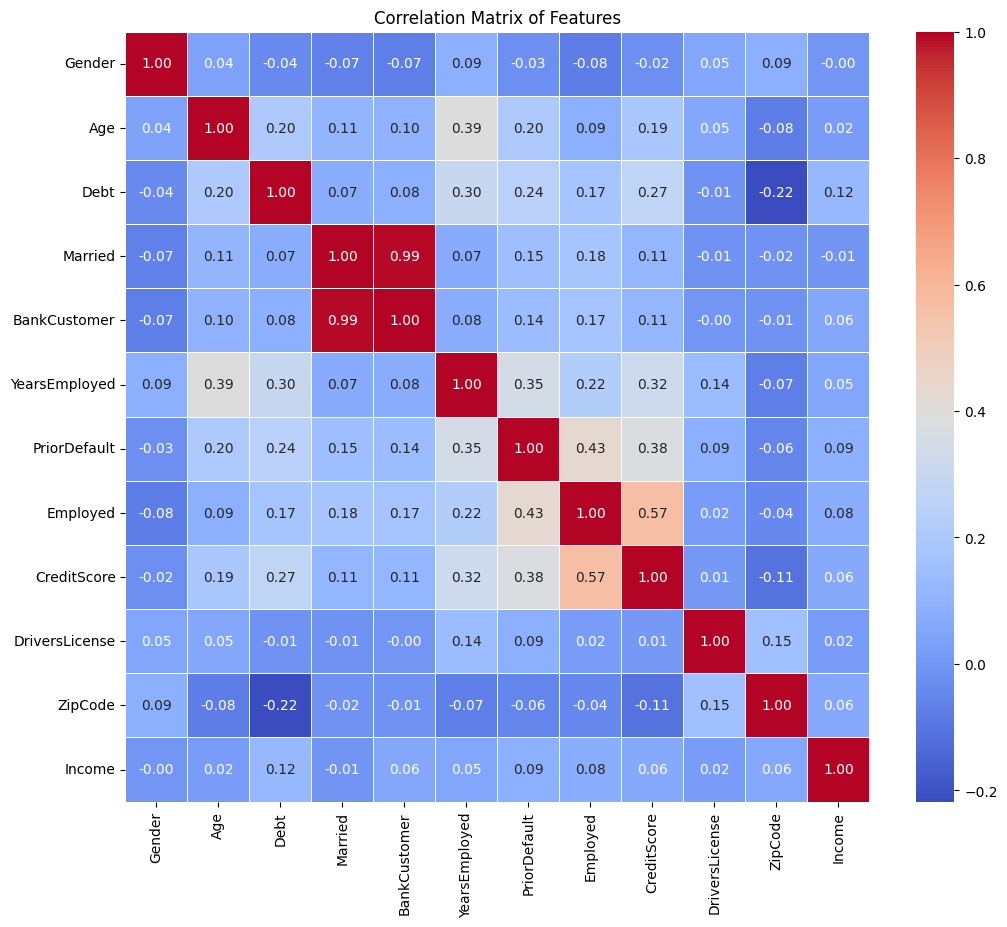

In [5]:
# Calculate the correlation matrix
correlation_matrix = X.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

The heatmap above displays the correlation matrix for the numerical features in the dataset. Each cell in the heatmap shows the correlation coefficient between two features.

*   **Values close to 1** indicate a strong positive correlation (as one feature increases, the other tends to increase).
*   **Values close to -1** indicate a strong negative correlation (as one feature increases, the other tends to decrease).
*   **Values close to 0** indicate a weak or no linear correlation.

In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


In [7]:
class_distribution = data['Approved'].value_counts()

print(class_distribution)

Approved
0    383
1    307
Name: count, dtype: int64


/tmp/ipython-input-2408767531.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


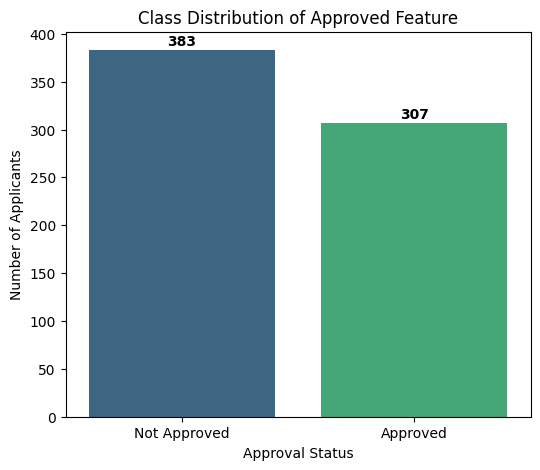

In [8]:
# Plot
plt.figure(figsize=(6, 5))
ax = sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')

# Titles and labels
plt.title('Class Distribution of Approved Feature')
plt.xlabel('Approval Status')
plt.ylabel('Number of Applicants')
plt.xticks([0, 1], ['Not Approved', 'Approved'])

# Add numbers on bars
for i, v in enumerate(class_distribution.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Define preprocessing: one-hot encode categorical columns, pass through numeric ones
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # keep numerical columns as-is
)

# Apply preprocessing
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [11]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded, y_train)

print(f"Original training set shape: {X_train_encoded.shape, y_train.shape}")
print(f"SMOTE training set shape: {X_train_smote.shape, y_train_smote.shape}")
print("Class distribution after SMOTE:\n", y_train_smote.value_counts())

Original training set shape: ((552, 34), (552,))
SMOTE training set shape: ((630, 34), (630,))
Class distribution after SMOTE:
 Approved
0    315
1    315
Name: count, dtype: int64


### What is SMOTE?

SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling method used to address class imbalance in a dataset. It works by creating synthetic samples from the minority class rather than by over-sampling with replacement. Here's how it generally works:

1.  **Select a minority class instance**: It picks a random instance from the minority class.
2.  **Find its k-nearest neighbors**: It identifies its k-nearest neighbors (usually 5) from the minority class.
3.  **Create synthetic samples**: It randomly chooses one of the k-nearest neighbors and creates a synthetic instance somewhere along the line segment joining the chosen instance and its neighbor. This is done by taking the difference between the feature vector of the sample and its chosen neighbor, multiplying it by a random number between 0 and 1, and adding it to the feature vector of the original sample.

### Why use SMOTE?

When dealing with imbalanced datasets (where one class significantly outnumbers the other), traditional machine learning algorithms tend to be biased towards the majority class. This can lead to a model that performs well on the majority class but poorly on the minority class, which is often the class of greater interest (e.g., fraud detection, disease diagnosis).

SMOTE helps to mitigate this issue by:
*   **Increasing the number of minority class samples**: This provides more data for the model to learn the characteristics of the minority class.
*   **Reducing bias**: By balancing the class distribution, SMOTE helps to prevent the model from overfitting to the majority class.
*   **Improving generalization**: The synthetic samples help the model generalize better to unseen data, as they introduce new, but similar, variations of the minority class.

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_encoded)

# Evaluate the model
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        68
           1       0.87      0.83      0.85        70

    accuracy                           0.85       138
   macro avg       0.85      0.85      0.85       138
weighted avg       0.85      0.85      0.85       138

Accuracy: 0.85


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Assuming X_train_smote and X_test_encoded are already defined
# Reshape data for Conv1D: (samples, time_steps, features)
# For Conv1D, we treat each feature as a separate time step for the 1D convolution.
# We will assume a single feature per time step here, so we add a new dimension.
X_train_smote_reshaped = X_train_smote.reshape(X_train_smote.shape[0], X_train_smote.shape[1], 1)
X_test_encoded_reshaped = X_test_encoded.reshape(X_test_encoded.shape[0], X_test_encoded.shape[1], 1)

print(f"Reshaped X_train_smote: {X_train_smote_reshaped.shape}")
print(f"Reshaped X_test_encoded: {X_test_encoded_reshaped.shape}")

Reshaped X_train_smote: (630, 34, 1)
Reshaped X_test_encoded: (138, 34, 1)


### Conv1D Model Definition

We define a Sequential model with:
- A `Conv1D` layer for feature extraction.
- A `MaxPooling1D` layer for dimensionality reduction.
- A `Flatten` layer to convert the 3D output to 1D.
- A `Dense` output layer with sigmoid activation for binary classification.

In [21]:
# Define the Conv1D model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_smote_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 32, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 16, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,529 (201.29 KB)

 Trainable params: 51,529 (201.29 KB)

 Non-trainable params: 0 (0.00 B)

### Train and Evaluate the Conv1D Model

Now, let's train the Conv1D model using the SMOTE-resampled training data and evaluate its performance on the test set.

In [30]:
# Train the model
history = model.fit(X_train_smote_reshaped, y_train_smote, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_encoded_reshaped, y_test, verbose=0)

print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_conv1d_proba = model.predict(X_test_encoded_reshaped)
y_pred_conv1d = (y_pred_conv1d_proba > 0.5).astype(int)

# Print classification report
from sklearn.metrics import classification_report
print("\nConv1D Classifier Report:")
print(classification_report(y_test, y_pred_conv1d))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8749 - loss: 0.4021 - val_accuracy: 0.8889 - val_loss: 0.2947
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8757 - loss: 0.2669 - val_accuracy: 0.8254 - val_loss: 0.3705
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9035 - loss: 0.2685 - val_accuracy: 0.9286 - val_loss: 0.2461
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8974 - loss: 0.2615 - val_accuracy: 0.8810 - val_loss: 0.2971
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9097 - loss: 0.2319 - val_accuracy: 0.8730 - val_loss: 0.3018
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9045 - loss: 0.2342 - val_accuracy: 0.9286 - val_loss: 0.1982
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9102 - loss: 0.2238 - val_accuracy: 0.9365 - val_loss: 0.2199
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9004 - loss: 0.2420 - val_accuracy: 0.8651 - v